In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore 

In [2]:
data=pd.read_csv('wisc_bc_data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [4]:
data.shape#569 r and 32 col

(569, 32)

In [5]:
data.dtypes

id                     int64
diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

In [6]:
data['diagnosis']=data.diagnosis.astype('category')

In [7]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
data.groupby(['diagnosis']).count()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357
M,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212


In [9]:
data=data.drop(labels='id',axis=1)

In [10]:
data.shape
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [11]:
x=data.drop(labels='diagnosis',axis=1)
y=data['diagnosis']
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [12]:
Xsacled=x.apply(zscore)

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(Xsacled,y,test_size=0.30,random_state=1)

In [14]:
NNH= KNeighborsClassifier(n_neighbors=5,weights='distance')

In [15]:
NNH.fit(X_train,Y_train)

KNeighborsClassifier(weights='distance')

In [16]:
predicted_labels=NNH.predict(X_test)
NNH.score(X_test,Y_test)

0.9649122807017544

In [17]:
from sklearn import metrics
print("confusion matrix")
cm=metrics.confusion_matrix(Y_test,predicted_labels,labels=['M','B'])
df_cm=pd.DataFrame(cm,index=[i for i in['M','B']],columns=[i for i in['predict M','predict B']] )

confusion matrix


<AxesSubplot:>

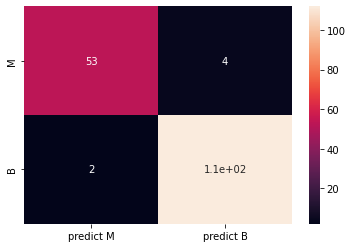

In [18]:
import seaborn as sns

sns.heatmap(df_cm,annot=True)

In [19]:
scores=[]
for k in range(1,50):
    NNH=KNeighborsClassifier(n_neighbors=k,weights='distance')
    NNH.fit(X_train,Y_train)
    scores.append(NNH.score(X_test,Y_test))

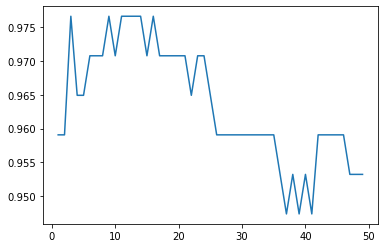

In [20]:
plt.plot(range(1,50),scores)